## Preprocessing Text

### Import Library

In [9]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [51]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Load Data

In [3]:
df = pd.read_csv('/content/cleaned_ulasan_tiktok.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,07be1285-e2cb-4228-8721-21c91af3e925,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,36.3.3,2024-09-03 07:51:56,No Reply,No Date,36.3.3
1,ae0206fa-fc6b-44ad-9c58-2b495f6dc32e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak event Afiliasi yang mengharuskan pemena...,4,1,35.6.3,2024-08-03 10:06:16,No Reply,No Date,35.6.3
2,cca03e4e-ee96-41b5-98a7-3906af44b0dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi yg sangat menguntungkan, dan banyak p...",5,0,37.9.4,2025-01-28 12:07:33,No Reply,No Date,37.9.4
3,0eab3844-8043-4948-9154-32d925cfeb7d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bug mulu gabisa dibuka harus download ulang trus,1,0,37.9.4,2024-12-14 02:47:12,No Reply,No Date,37.9.4
4,5455a81a-e5f0-4a93-99a5-07872688c3b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lumayan keren lh,1,0,37.9.4,2024-11-12 10:11:01,No Reply,No Date,37.9.4


In [6]:
print(df.duplicated().sum())  # Cek jumlah duplikat


0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  10000 non-null  object
 7   at                    10000 non-null  object
 8   replyContent          10000 non-null  object
 9   repliedAt             10000 non-null  object
 10  appVersion            10000 non-null  object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [13]:
# hapus kolom repliedAt
df = df.drop('repliedAt', axis=1)

In [15]:
# jadikan at sebagai datetime
df['at'] = pd.to_datetime(df['at'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  10000 non-null  object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          10000 non-null  object        
 9   appVersion            10000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 781.4+ KB


In [17]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

In [18]:
def casefoldingText(text): # Ubah karakter menjadi huruf kecil
    text = text.lower()
    return text

In [19]:
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

In [20]:
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [21]:
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

In [22]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [24]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [27]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

In [28]:
# Mengubah huruf dalam teks menjadi huruf kecil simpan 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)


In [29]:
# Mengganti kata-kata slang dengan kata-kata standar simpan 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)


In [32]:
# Memecah teks menjadi token simpan 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)


In [33]:
# Menghapus kata-kata umum dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [34]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,07be1285-e2cb-4228-8721-21c91af3e925,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,36.3.3,2024-09-03 07:51:56,No Reply,36.3.3,mantap,mantap,mantap,[mantap],[mantap],mantap
1,ae0206fa-fc6b-44ad-9c58-2b495f6dc32e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak event Afiliasi yang mengharuskan pemena...,4,1,35.6.3,2024-08-03 10:06:16,No Reply,35.6.3,Banyak event Afiliasi yang mengharuskan pemena...,banyak event afiliasi yang mengharuskan pemena...,banyak event afiliasi yang mengharuskan pemena...,"[banyak, event, afiliasi, yang, mengharuskan, ...","[event, afiliasi, mengharuskan, pemenangnya, y...",event afiliasi mengharuskan pemenangnya yg laku
2,cca03e4e-ee96-41b5-98a7-3906af44b0dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi yg sangat menguntungkan, dan banyak p...",5,0,37.9.4,2025-01-28 12:07:33,No Reply,37.9.4,Aplikasi yg sangat menguntungkan dan banyak pe...,aplikasi yg sangat menguntungkan dan banyak pe...,aplikasi yg sangat menguntungkan dan banyak pe...,"[aplikasi, yg, sangat, menguntungkan, dan, ban...","[aplikasi, yg, menguntungkan, pengalaman, yg, ...",aplikasi yg menguntungkan pengalaman yg blm te...
3,0eab3844-8043-4948-9154-32d925cfeb7d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bug mulu gabisa dibuka harus download ulang trus,1,0,37.9.4,2024-12-14 02:47:12,No Reply,37.9.4,bug mulu gabisa dibuka harus download ulang trus,bug mulu gabisa dibuka harus download ulang trus,bug mulu gabisa dibuka harus download ulang trus,"[bug, mulu, gabisa, dibuka, harus, download, u...","[bug, mulu, gabisa, dibuka, download, ulang, t...",bug mulu gabisa dibuka download ulang trus
4,5455a81a-e5f0-4a93-99a5-07872688c3b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lumayan keren lh,1,0,37.9.4,2024-11-12 10:11:01,No Reply,37.9.4,Lumayan keren lh,lumayan keren lh,lumayan keren lh,"[lumayan, keren, lh]","[lumayan, keren, lh]",lumayan keren lh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18dfde66-a0d7-44f7-b778-31075fa9b550,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tiktok tll,setiap mau buka apk malah lag gak b...",1,0,37.9.4,2025-01-07 02:41:42,No Reply,37.9.4,tiktok tllsetiap mau buka apk malah lag gak bi...,tiktok tllsetiap mau buka apk malah lag gak bi...,tiktok tllsetiap mau buka apk malah lag gak bi...,"[tiktok, tllsetiap, mau, buka, apk, malah, lag...","[tiktok, tllsetiap, buka, apk, lag, bukakalo, ...",tiktok tllsetiap buka apk lag bukakalo dibuka ...
9996,cb0eca51-b991-4cd6-a484-c143f6a9600d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,belanja semakin mudah 🥰,5,0,36.3.3,2024-09-09 04:37:58,No Reply,36.3.3,belanja semakin mudah,belanja semakin mudah,belanja semakin mudah,"[belanja, semakin, mudah]","[belanja, mudah]",belanja mudah
9997,42a6c70f-b6c5-4288-9b83-637f9f514727,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gamenya seru wajib di download,1,0,37.9.4,2024-11-30 12:18:41,No Reply,37.9.4,gamenya seru wajib di download,gamenya seru wajib di download,gamenya seru wajib di download,"[gamenya, seru, wajib, di, download]","[gamenya, seru, wajib, download]",gamenya seru wajib download
9998,88cc16fc-5ea0-4d42-94e8-362e5bd1bc05,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya suka aplikasi tik tok sanggar berguna,5,0,38.3.3,2025-02-03 12:10:35,No Reply,38.3.3,Saya suka aplikasi tik tok sanggar berguna,saya suka aplikasi tik tok sanggar berguna,saya suka aplikasi tik tok sanggar berguna,"[saya, suka, aplikasi, tik, tok, sanggar, berg...","[suka, aplikasi, tik, tok, sanggar, berguna]",suka aplikasi tik tok sanggar berguna


### Pelabelan

In [36]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [37]:
 def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [38]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    5913
negative    4087
Name: count, dtype: int64


polarity
positive    59.13
negative    40.87
Name: proportion, dtype: float64


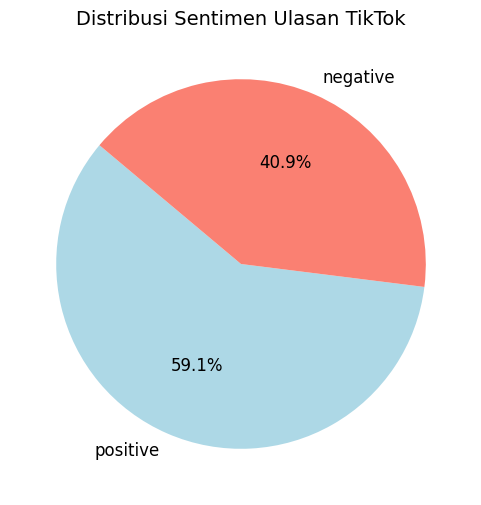

In [40]:
sentiment_counts = df['polarity'].value_counts()
sentiment_percentage = df['polarity'].value_counts(normalize=True) * 100
print(sentiment_percentage)
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['lightblue', 'salmon'], startangle=140, textprops={'fontsize': 12})
plt.title('Distribusi Sentimen Ulasan TikTok', fontsize=14)
plt.show()



### Eksplorasi Label

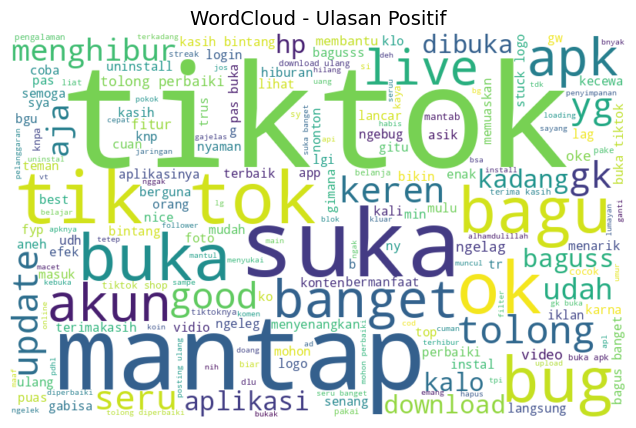

In [44]:
# Gabungkan semua teks untuk sentimen positif
positive_text = ' '.join([' '.join(words) for words in df[df['polarity'] == 'positive']['text_stopword']])
# Generate WordCloud
wordcloud_positive = WordCloud(width=800, height=500, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Ulasan Positif", fontsize=14)
plt.show()


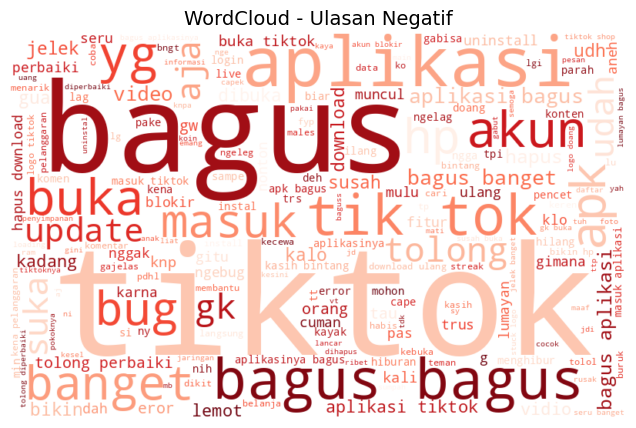

In [46]:
# Gabungkan semua teks untuk sentimen negatif
negative_text = ' '.join([' '.join(words) for words in df[df['polarity'] == 'negative']['text_stopword']])
# Generate WordCloud
wordcloud_negative = WordCloud(width=800, height=500, background_color='white', colormap='Reds').generate(negative_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Ulasan Negatif", fontsize=14)
plt.show()


### Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [49]:
# Pisahkan data menjadi fitur dan label
X = df['text_akhir']
y = df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [52]:
# Konversi hasil ekstraksi fitur ke dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### Modeling

In [54]:
# model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.964875
Random Forest - accuracy_test: 0.8835


In [55]:
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.902875
Logistic Regression - accuracy_test: 0.8845


### Requirements.txt

In [4]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.12
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.10.0.33.26
asttokens==3.0.0
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.36.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection